In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import scipy
import pylab as pl
import numpy as np
import scipy.optimize as opt
%matplotlib inline


In [4]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0


In [8]:
print(len(churn_df))
print(len(churn_df.columns))

200
28


In [9]:
print(churn_df.columns)

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')


In [11]:
X = np.asarray(churn_df.iloc[:, :-1])

Y=np.asarray(churn_df.iloc[:, -1])


array([1, 1, 0, 0, 0])

In [12]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

array([[1.10000e+01, 3.30000e+01, 7.00000e+00, 1.36000e+02, 5.00000e+00,
        5.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 4.40000e+00,
        2.07500e+01, 0.00000e+00, 1.52500e+01, 3.57000e+01, 4.20000e+01,
        2.11450e+02, 1.25000e+02, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 1.48200e+00, 3.03300e+00,
        4.91300e+00, 4.00000e+00],
       [3.30000e+01, 3.30000e+01, 1.20000e+01, 3.30000e+01, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.45000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.88800e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.24600e+00, 3.24000e+00,
        3.49700e+00, 1.00000e+00],
       [2.30000e+01, 3.00000e+01, 9.00000e+00, 3.00000e+01, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.30000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 27) (160,)
Test set: (40, 27) (40,)


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


0.6388888888888888
model3:Test set Accuracy:  0.675
Confusion matrix, without normalization
[[ 4 11]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        25
           1       0.67      0.27      0.38        15

    accuracy                           0.68        40
   macro avg       0.67      0.59      0.58        40
weighted avg       0.67      0.68      0.63        40



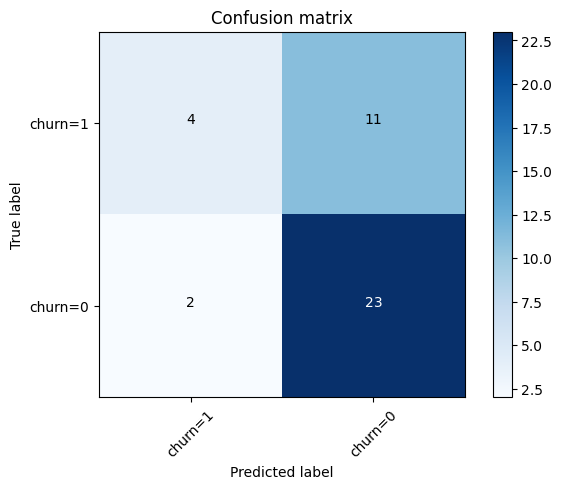

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import jaccard_score
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob

print(jaccard_score(y_test, yhat,pos_label=0))
print("model3:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))


0.7575757575757576
model3:Test set Accuracy:  0.8
Confusion matrix, without normalization
[[ 7  8]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        25
           1       1.00      0.47      0.64        15

    accuracy                           0.80        40
   macro avg       0.88      0.73      0.75        40
weighted avg       0.85      0.80      0.78        40



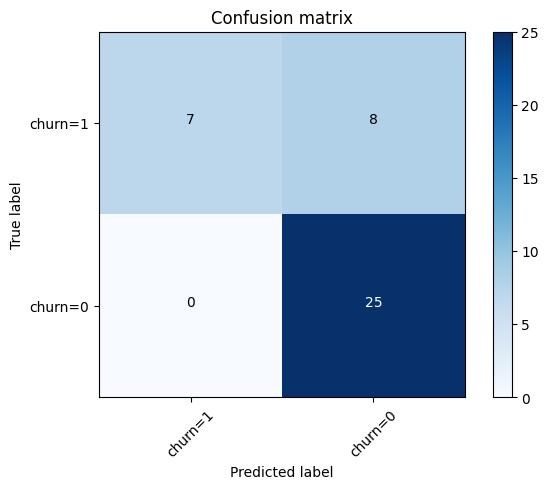

In [21]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 7).fit(X_train,y_train)
yhat =knn.predict(X_test)
yhat
yhat_prob = knn.predict_proba(X_test)
yhat_prob

print(jaccard_score(y_test, yhat,pos_label=0))
print("model3:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))

0.6875
model3:Test set Accuracy:  0.75
Confusion matrix, without normalization
[[ 8  7]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        25
           1       0.73      0.53      0.62        15

    accuracy                           0.75        40
   macro avg       0.74      0.71      0.72        40
weighted avg       0.75      0.75      0.74        40



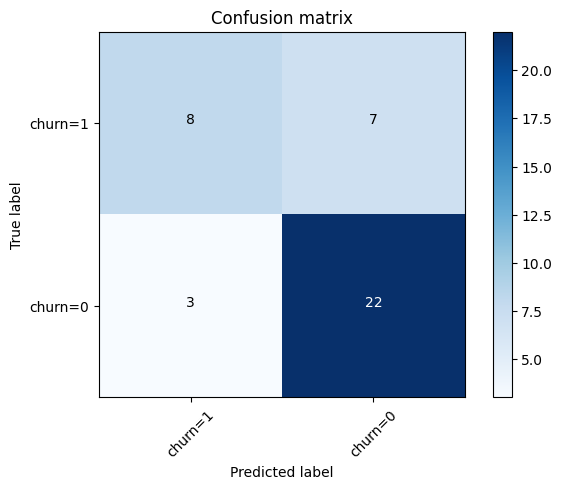

In [36]:
from sklearn.tree import DecisionTreeClassifier
 
Dtree=DecisionTreeClassifier(criterion="entropy", max_depth = 15)
Dtree.fit(X_train,y_train)
yhat =Dtree.predict(X_test)
yhat
yhat_prob = Dtree.predict_proba(X_test)
yhat_prob

print(jaccard_score(y_test, yhat,pos_label=0))
print("model3:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))

0.6756756756756757
model3:Test set Accuracy:  0.7
Confusion matrix, without normalization
[[ 3 12]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        25
           1       1.00      0.20      0.33        15

    accuracy                           0.70        40
   macro avg       0.84      0.60      0.57        40
weighted avg       0.80      0.70      0.63        40



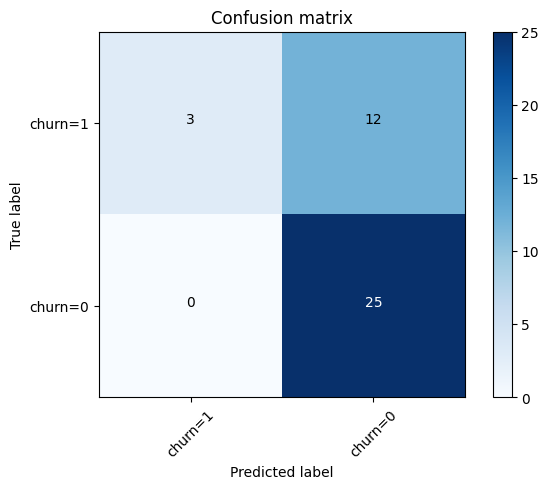

In [29]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid', C=0.5)
clf.fit(X_train, y_train) 
yhat =clf.predict(X_test)
yhat


print(jaccard_score(y_test, yhat,pos_label=0))
print("model3:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))